In [1]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
simulator = AerSimulator()

import numpy as np
import math
import random

from sympy import Matrix
from sympy.physics.quantum import TensorProduct

import matplotlib.pyplot as plt

e= math.e
pi = math.pi
i = 1j

In [37]:
def Interfere(qc, u_unitary, v_unitary, start_qubit):
    U = UnitaryGate(u_unitary,label='U').control(1)
    V = UnitaryGate(v_unitary,label='V').control(1)
    
    # First Hadamard
    qc.h(start_qubit)
    qc.barrier(label='interfere')
    # Interference
    qc.append(U,range(start_qubit,start_qubit+int(math.log(len(u_unitary),2))+1),0)
    
    qc.x(start_qubit)
    qc.append(V,range(start_qubit,start_qubit+int(math.log(len(v_unitary),2))+1),0)
    qc.x(start_qubit)
    
    qc.barrier(label='outerfere')
    # Second Hadamard
    qc.h(start_qubit)
    
    qc.save_statevector()
    
    return qc

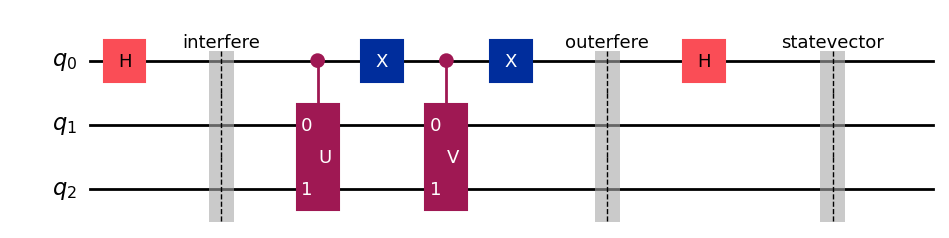

In [38]:
qc = QuantumCircuit(3)
U = np.array([[i,0],
              [0,i]])
V = np.array([[0,1],
              [-1,0]])
TU = TensorProduct(U,U)

Interfere(qc,TU,TensorProduct(V,V),0)
qc.draw(output='mpl')

In [39]:
job = transpile(qc,backend=simulator)
shots = 1

result = simulator.run(job, shots=shots).result()
    
psi = result.get_statevector(0)
psi.draw(output='latex')

<IPython.core.display.Latex object>